<a href="https://colab.research.google.com/github/himanshuarora1703/codebasics-ML-exercise/blob/main/Random%20Forest%20Classifier/Random_Forest_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris

data = load_iris()

In [5]:
# check the keys of the dataset

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

In [12]:
# do train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=65)

print('The shape of training set is',X_train.shape)
print('The shape of test set is',X_test.shape)

The shape of training set is (120, 4)
The shape of test set is (30, 4)


In [13]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
93,5.0,2.3,3.3,1.0
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4
74,6.4,2.9,4.3,1.3
55,5.7,2.8,4.5,1.3
...,...,...,...,...
71,6.1,2.8,4.0,1.3
40,5.0,3.5,1.3,0.3
63,6.1,2.9,4.7,1.4
117,7.7,3.8,6.7,2.2


In [17]:
# train the model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

# do the training
rf.fit(X_train,y_train)

# do the predictions
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

from sklearn.metrics import accuracy_score,classification_report
print('The train accuracy is',accuracy_score(y_train,y_pred_train))
print('The test accuracy is',accuracy_score(y_test,y_pred_test))

The train accuracy is 0.9916666666666667
The test accuracy is 0.9333333333333333


We can observe the case of overfitting here

In [19]:
# do cross validation
from sklearn.model_selection import cross_validate

score = cross_validate(rf,X,y,cv=5,scoring='accuracy',return_train_score=True)

print('the mean train score is',np.mean(score['train_score']))
print('the mean test score is',np.mean(score['test_score']))

the mean train score is 0.9933333333333334
the mean test score is 0.9666666666666668


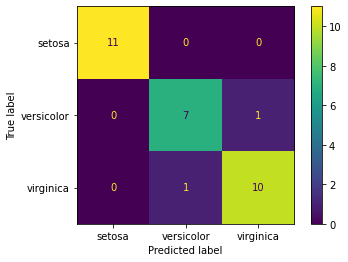

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test),display_labels=data['target_names'])

cm.plot()

In [22]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.88      0.88         8
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [28]:
# perform grid_search

from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':np.arange(10,110,10),
    'max_depth':[2,3,4,5,6],
    'min_samples_leaf':[10,20,30,40],
    'oob_score':[True,False]
}
search = GridSearchCV(rf,params,cv=5,scoring='accuracy',return_train_score=True)

search.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 20, 30, 40],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'oob_score': [True, False]},
             return_train_score=True, scoring='accuracy')

In [29]:
# best score
print('the best score is',search.best_score_)

# the best params are
print('The best parameters are',search.best_params_)

the best score is 0.9833333333333334
The best parameters are {'max_depth': 4, 'min_samples_leaf': 20, 'n_estimators': 70, 'oob_score': True}


In [37]:
pd.DataFrame(search.cv_results_).sort_values(by=['mean_test_score','mean_train_score'],ascending=False)[['mean_test_score','mean_train_score','params']]

,mean_test_score,mean_train_score,params
192,0.983333,0.960417,"{'max_depth': 4, 'min_samples_leaf': 20, 'n_es..."
33,0.975000,0.975000,"{'max_depth': 2, 'min_samples_leaf': 20, 'n_es..."
271,0.975000,0.975000,"{'max_depth': 5, 'min_samples_leaf': 20, 'n_es..."
199,0.975000,0.972917,"{'max_depth': 4, 'min_samples_leaf': 20, 'n_es..."
240,0.975000,0.970833,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es..."
...,...,...,...
301,0.333333,0.341667,"{'max_depth': 5, 'min_samples_leaf': 40, 'n_es..."
65,0.325000,0.343750,"{'max_depth': 2, 'min_samples_leaf': 40, 'n_es..."
391,0.325000,0.343750,"{'max_depth': 6, 'min_samples_leaf': 40, 'n_es..."
149,0.316667,0.345833,"{'max_depth': 3, 'min_samples_leaf': 40, 'n_es..."


In [38]:
search.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'n_estimators': 70, 'oob_score': True}

In [40]:
# fit with the best parameters

# train the model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=70,max_depth=4,min_samples_leaf=20,oob_score=True)

# do the training
rf.fit(X_train,y_train)

# do the predictions
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

from sklearn.metrics import accuracy_score,classification_report
print('The train accuracy is',accuracy_score(y_train,y_pred_train))
print('The test accuracy is',accuracy_score(y_test,y_pred_test))

The train accuracy is 0.9666666666666667
The test accuracy is 0.9666666666666667


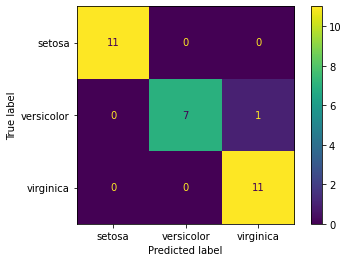

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test),display_labels=data['target_names'])

cm.plot()

In [42]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [43]:
# do cross validation
from sklearn.model_selection import cross_validate

score = cross_validate(rf,X,y,cv=5,scoring='accuracy',return_train_score=True)

print('the mean train score is',np.mean(score['train_score']))
print('the mean test score is',np.mean(score['test_score']))

the mean train score is 0.9650000000000001
the mean test score is 0.9533333333333334
